<a href="https://colab.research.google.com/github/HaidyMohamedAnter/Ai-Platforms-ashion-MNIST-Classification-using-CNN-Keras-PyTorch-/blob/main/AiPlatforms_2305309_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Name:Haidy Mohamed Anter
#id:2305309

In [2]:
#CNNOnFashionMNISTUsingKeras

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
#Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# Reshape data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
#CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#Compile the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

In [10]:
#Train the model
history = model.fit(x_train, y_train, epochs=10,
validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7810 - loss: 0.6080 - val_accuracy: 0.8661 - val_loss: 0.3576
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8871 - loss: 0.3076 - val_accuracy: 0.8918 - val_loss: 0.3030
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9043 - loss: 0.2552 - val_accuracy: 0.9031 - val_loss: 0.2686
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9160 - loss: 0.2230 - val_accuracy: 0.9076 - val_loss: 0.2564
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9291 - loss: 0.1919 - val_accuracy: 0.9123 - val_loss: 0.2482
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9369 - loss: 0.1690 - val_accuracy: 0.9146 - val_loss: 0.2404
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9453 - loss: 0.1465 - val_accuracy: 0.9067 - val_loss: 0.2766
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9495 - loss: 0.1332 -

In [11]:
#Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9125 - loss: 0.2970
Test Accuracy: 0.9125000238418579


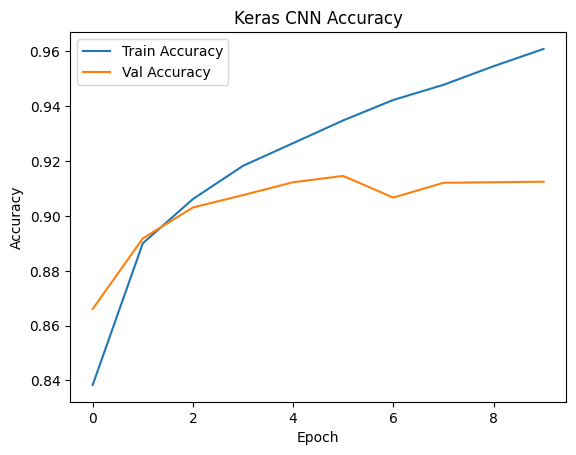

In [12]:
#Plot training
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Keras CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
#Get predictions
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


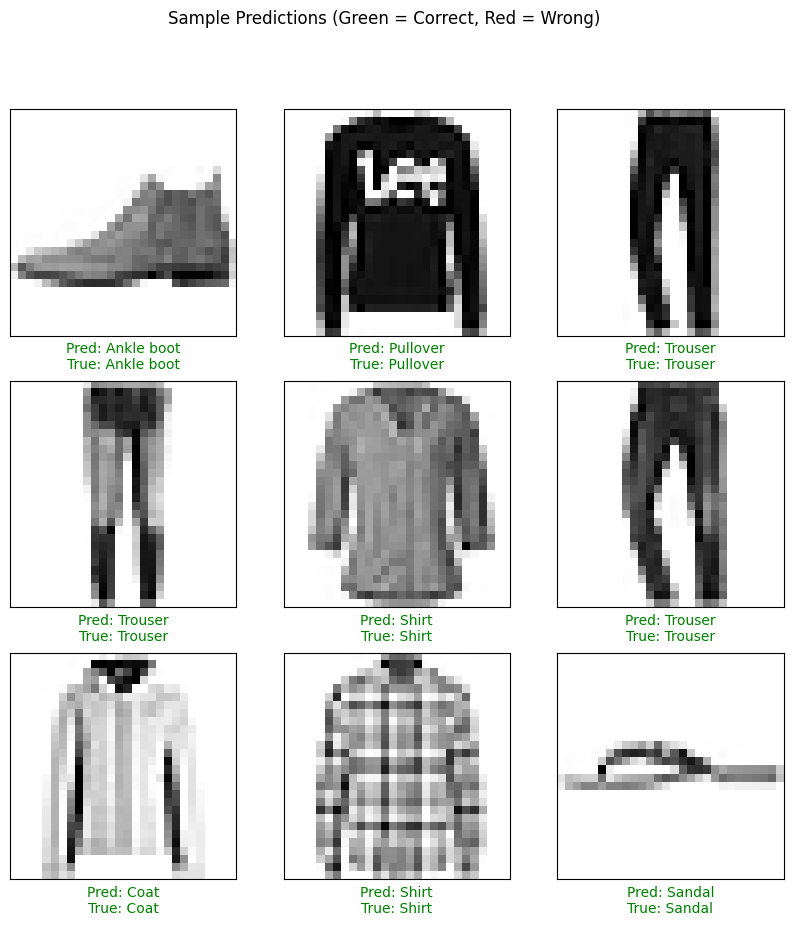

In [22]:
# images with predicted  true labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}",
               color=color)
plt.suptitle("Sample Predictions (Green = Correct, Red = Wrong)")
plt.show()

In [23]:
#CNN on Fashion MNIST using PyTorch

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [25]:
#فransformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [26]:
#Load dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                              download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 26.4M/26.4M [00:02<00:00, 10.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 174kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.20MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 24.6MB/s]


In [27]:
#CnnModel
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

In [28]:
model = CNNModel()

In [29]:
#LossAndOptimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [30]:
#Training loop
train_losses = []
val_accuracies = []

In [34]:
for epoch in range(10):
    running_loss = 0.0
    for batch_idx, (images, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}, Batch {batch_idx}, Loss: {loss.item():.4f}")

Epoch 1, Batch 0, Loss: 0.1828
Epoch 1, Batch 100, Loss: 0.1118
Epoch 1, Batch 200, Loss: 0.1478
Epoch 1, Batch 300, Loss: 0.1253
Epoch 1, Batch 400, Loss: 0.4220
Epoch 1, Batch 500, Loss: 0.1985
Epoch 1, Batch 600, Loss: 0.1038
Epoch 1, Batch 700, Loss: 0.1221
Epoch 1, Batch 800, Loss: 0.2347
Epoch 1, Batch 900, Loss: 0.0899
Epoch 2, Batch 0, Loss: 0.0962
Epoch 2, Batch 100, Loss: 0.1090
Epoch 2, Batch 200, Loss: 0.1896
Epoch 2, Batch 300, Loss: 0.1020
Epoch 2, Batch 400, Loss: 0.1606
Epoch 2, Batch 500, Loss: 0.0414
Epoch 2, Batch 600, Loss: 0.1965
Epoch 2, Batch 700, Loss: 0.2563
Epoch 2, Batch 800, Loss: 0.1898
Epoch 2, Batch 900, Loss: 0.3299
Epoch 3, Batch 0, Loss: 0.1914
Epoch 3, Batch 100, Loss: 0.0690
Epoch 3, Batch 200, Loss: 0.1562
Epoch 3, Batch 300, Loss: 0.2264
Epoch 3, Batch 400, Loss: 0.1966
Epoch 3, Batch 500, Loss: 0.1367
Epoch 3, Batch 600, Loss: 0.1451
Epoch 3, Batch 700, Loss: 0.0321
Epoch 3, Batch 800, Loss: 0.1642
Epoch 3, Batch 900, Loss: 0.1471
Epoch 4, Batch 0

In [36]:
#Validation
correct, total = 0, 0
model.eval()
with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
val_acc = 100 * correct / total
train_losses.append(running_loss / len(trainloader))
val_accuracies.append(val_acc)
print(f"Epoch {epoch+1} Completed: Avg Loss={running_loss/len(trainloader):.4f}, Val Acc={val_acc:.2f}%")
model.train()

Epoch 10 Completed: Avg Loss=0.0430, Val Acc=91.97%


CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): LogSoftmax(dim=1)
)

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [39]:
dataiter = iter(testloader)
images, labels = next(dataiter)

In [40]:
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

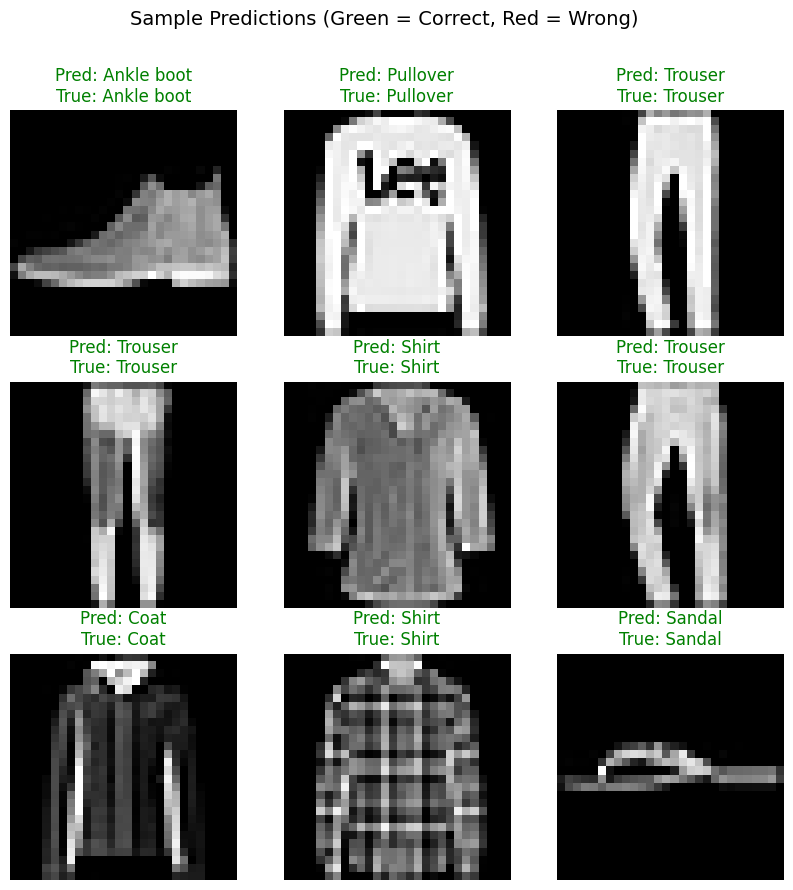

In [41]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.imshow(images[i].squeeze(), cmap='gray')
    true_label = class_names[labels[i]]
    pred_label = class_names[preds[i]]
    color = "green" if true_label == pred_label else "red"
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
plt.suptitle("Sample Predictions (Green = Correct, Red = Wrong)", fontsize=14)
plt.show()